In [ ]:
# Import necessary libraries
import json
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Bidirectional, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Load and preprocess the data
with open('Sarcasm_Headlines_Dataset.json') as f:
    data = [json.loads(line) for line in f]

df = pd.DataFrame(data)
df = df[['headline', 'is_sarcastic']]

# Tokenize and pad sequences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['headline'])
sequences = tokenizer.texts_to_sequences(df['headline'])
X = pad_sequences(sequences, maxlen=30)  # maxlen chosen to fit most headlines
y = df['is_sarcastic'].values

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to build individual models
def build_lstm_model():
    model = Sequential([
        Embedding(len(tokenizer.word_index) + 1, 64, input_length=30),
        LSTM(64),
        Dense(1, activation='sigmoid')
    ])
    return model

def build_bilstm_model():
    model = Sequential([
        Embedding(len(tokenizer.word_index) + 1, 64, input_length=30),
        Bidirectional(LSTM(64)),
        Dense(1, activation='sigmoid')
    ])
    return model

# Compile and train LSTM model
lstm_model = build_lstm_model()
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
lstm_model.fit(X_train, y_train, validation_split=0.1, epochs=10, batch_size=64, verbose=1)

# Compile and train BiLSTM model
bilstm_model = build_bilstm_model()
bilstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
bilstm_model.fit(X_train, y_train, validation_split=0.1, epochs=10, batch_size=64, verbose=1)

# Ensemble Predictions
lstm_preds = lstm_model.predict(X_test)
bilstm_preds = bilstm_model.predict(X_test)

# Weighted average ensemble (you can adjust weights if needed)
ensemble_preds = (0.5 * lstm_preds + 0.5 * bilstm_preds) > 0.5

# Evaluate ensemble
accuracy = accuracy_score(y_test, ensemble_preds)
precision = precision_score(y_test, ensemble_preds)
recall = recall_score(y_test, ensemble_preds)
f1 = f1_score(y_test, ensemble_preds)

print(f'Ensemble Model - Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}')

# Plotting accuracy and loss for LSTM and BiLSTM

plt.plot(lstm_model.history.history['accuracy'], label='LSTM train accuracy')
plt.plot(lstm_model.history.history['val_accuracy'], label='LSTM val accuracy')
plt.plot(bilstm_model.history.history['accuracy'], label='BiLSTM train accuracy')
plt.plot(bilstm_model.history.history['val_accuracy'], label='BiLSTM val accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


322/322 ━━━━━━━━━━━━━━━━━━━━ 19s 53ms/step - accuracy: 0.7012 - loss: 0.5547 - val_accuracy: 0.8249 - val_loss: 0.3773
Epoch 2/10
322/322 ━━━━━━━━━━━━━━━━━━━━ 20s 51ms/step - accuracy: 0.9284 - loss: 0.1924 - val_accuracy: 0.8507 - val_loss: 0.3726
Epoch 3/10
322/322 ━━━━━━━━━━━━━━━━━━━━ 22s 55ms/step - accuracy: 0.9734 - loss: 0.0837 - val_accuracy: 0.8437 - val_loss: 0.4776
Epoch 4/10
322/322 ━━━━━━━━━━━━━━━━━━━━ 17s 53ms/step - accuracy: 0.9886 - loss: 0.0364 - val_accuracy: 0.8432 - val_loss: 0.5285
Epoch 5/10
322/322 ━━━━━━━━━━━━━━━━━━━━ 19s 48ms/step - accuracy: 0.9948 - loss: 0.0193 - val_accuracy: 0.8345 - val_loss: 0.6452
Epoch 6/10
322/322 ━━━━━━━━━━━━━━━━━━━━ 22s 52ms/step - accuracy: 0.9980 - loss: 0.0086 - val_accuracy: 0.8301 - val_loss: 0.8311
Epoch 7/10
322/322 ━━━━━━━━━━━━━━━━━━━━ 21s 54ms/step - accuracy: 0.9978 - loss: 0.0075 - val_accuracy: 0.8271 - val_loss: 0.9342
Epoch 8/10
322/322 ━━━━━━━━━━━━━━━━━━━━ 17s 53ms/step - accuracy: 0.9989 - loss: 0.0046 - val_accurac

KeyError: 'accuracy'

In [ ]:
# Load and preprocess the data
with open('Sarcasm_Headlines_Dataset.json') as f:
    data = [json.loads(line) for line in f]

df = pd.DataFrame(data)
df = df[['headline', 'is_sarcastic']]

# Tokenize and pad sequences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['headline'])
sequences = tokenizer.texts_to_sequences(df['headline'])
X = pad_sequences(sequences, maxlen=30)  # maxlen chosen to fit most headlines
y = df['is_sarcastic'].values

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to build individual models
def build_lstm_model():
    model = Sequential([
        Embedding(len(tokenizer.word_index) + 1, 64, input_length=30),
        LSTM(64),
        Dense(1, activation='sigmoid')
    ])
    return model

def build_bilstm_model():
    model = Sequential([
        Embedding(len(tokenizer.word_index) + 1, 64, input_length=30),
        Bidirectional(LSTM(64)),
        Dense(1, activation='sigmoid')
    ])
    return model

# Compile and train LSTM model
lstm_model = build_lstm_model()
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
lstm_history = lstm_model.fit(X_train, y_train, validation_split=0.1, epochs=10, batch_size=64, verbose=1)

# Compile and train BiLSTM model
bilstm_model = build_bilstm_model()
bilstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
bilstm_history = bilstm_model.fit(X_train, y_train, validation_split=0.1, epochs=10, batch_size=64, verbose=1)

# LSTM Test Predictions
lstm_test_preds = (lstm_model.predict(X_test) > 0.5).astype('int32')
lstm_test_accuracy = accuracy_score(y_test, lstm_test_preds)

# BiLSTM Test Predictions
bilstm_test_preds = (bilstm_model.predict(X_test) > 0.5).astype('int32')
bilstm_test_accuracy = accuracy_score(y_test, bilstm_test_preds)

# Ensemble Predictions
lstm_preds = lstm_model.predict(X_test)
bilstm_preds = bilstm_model.predict(X_test)
ensemble_preds = (0.5 * lstm_preds + 0.5 * bilstm_preds) > 0.5
ensemble_test_accuracy = accuracy_score(y_test, ensemble_preds)

# Evaluate ensemble
ensemble_precision = precision_score(y_test, ensemble_preds)
ensemble_recall = recall_score(y_test, ensemble_preds)
ensemble_f1 = f1_score(y_test, ensemble_preds)

# Print Train, Validation, and Test Accuracies
print("LSTM Model - Train Accuracy: {:.4f}, Validation Accuracy: {:.4f}, Test Accuracy: {:.4f}".format(
    lstm_history.history['accuracy'][-1], lstm_history.history['val_accuracy'][-1], lstm_test_accuracy))
print("BiLSTM Model - Train Accuracy: {:.4f}, Validation Accuracy: {:.4f}, Test Accuracy: {:.4f}".format(
    bilstm_history.history['accuracy'][-1], bilstm_history.history['val_accuracy'][-1], bilstm_test_accuracy))
print("Ensemble Model - Test Accuracy: {:.4f}, Precision: {:.4f}, Recall: {:.4f}, F1 Score: {:.4f}".format(
    ensemble_test_accuracy, ensemble_precision, ensemble_recall, ensemble_f1))

# Confusion Matrices
lstm_cm = confusion_matrix(y_test, lstm_test_preds)
bilstm_cm = confusion_matrix(y_test, bilstm_test_preds)
ensemble_cm = confusion_matrix(y_test, ensemble_preds)

# Plotting Confusion Matrices
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.heatmap(lstm_cm, annot=True, fmt='d', cmap='Blues')
plt.title('LSTM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.subplot(1, 3, 2)
sns.heatmap(bilstm_cm, annot=True, fmt='d', cmap='Blues')
plt.title('BiLSTM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.subplot(1, 3, 3)
sns.heatmap(ensemble_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Ensemble Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.tight_layout()
plt.show()

# Plotting Training and Validation Accuracy for LSTM
plt.figure(figsize=(10, 6))
plt.plot(lstm_history.history['accuracy'], label='LSTM Train Accuracy')
plt.plot(lstm_history.history['val_accuracy'], label='LSTM Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy for LSTM')
plt.grid(True)
plt.show()

# Plotting Training and Validation Accuracy for BiLSTM
plt.figure(figsize=(10, 6))
plt.plot(bilstm_history.history['accuracy'], label='BiLSTM Train Accuracy')
plt.plot(bilstm_history.history['val_accuracy'], label='BiLSTM Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy for BiLSTM')
plt.grid(True)
plt.show()

# Plotting Ensemble Metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [ensemble_test_accuracy, ensemble_precision, ensemble_recall, ensemble_f1]
plt.figure(figsize=(8, 5))
plt.bar(metrics, values, color=['skyblue', 'lightgreen', 'salmon', 'orange'])
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.ylim(0, 1)
plt.title('Ensemble Model Performance Metrics')
plt.grid(axis='y')
plt.show()



Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


322/322 ━━━━━━━━━━━━━━━━━━━━ 17s 44ms/step - accuracy: 0.6711 - loss: 0.5870 - val_accuracy: 0.8297 - val_loss: 0.3653
Epoch 2/10
322/322 ━━━━━━━━━━━━━━━━━━━━ 14s 42ms/step - accuracy: 0.9132 - loss: 0.2187 - val_accuracy: 0.8498 - val_loss: 0.3568
Epoch 3/10
322/322 ━━━━━━━━━━━━━━━━━━━━ 14s 45ms/step - accuracy: 0.9705 - loss: 0.0918 - val_accuracy: 0.8454 - val_loss: 0.4672
Epoch 4/10
322/322 ━━━━━━━━━━━━━━━━━━━━ 20s 43ms/step - accuracy: 0.9885 - loss: 0.0362 - val_accuracy: 0.8389 - val_loss: 0.5833
Epoch 5/10
322/322 ━━━━━━━━━━━━━━━━━━━━ 14s 42ms/step - accuracy: 0.9944 - loss: 0.0189 - val_accuracy: 0.8424 - val_loss: 0.6938
Epoch 6/10
322/322 ━━━━━━━━━━━━━━━━━━━━ 21s 43ms/step - accuracy: 0.9973 - loss: 0.0121 - val_accuracy: 0.8402 - val_loss: 0.7678
Epoch 7/10
322/322 ━━━━━━━━━━━━━━━━━━━━ 14s 43ms/step - accuracy: 0.9989 - loss: 0.0038 - val_accuracy: 0.8397 - val_loss: 0.8822
Epoch 8/10
322/322 ━━━━━━━━━━━━━━━━━━━━ 20s 43ms/step - accuracy: 0.9992 - loss: 0.0032 - val_accurac

NameError: name 'confusion_matrix' is not defined

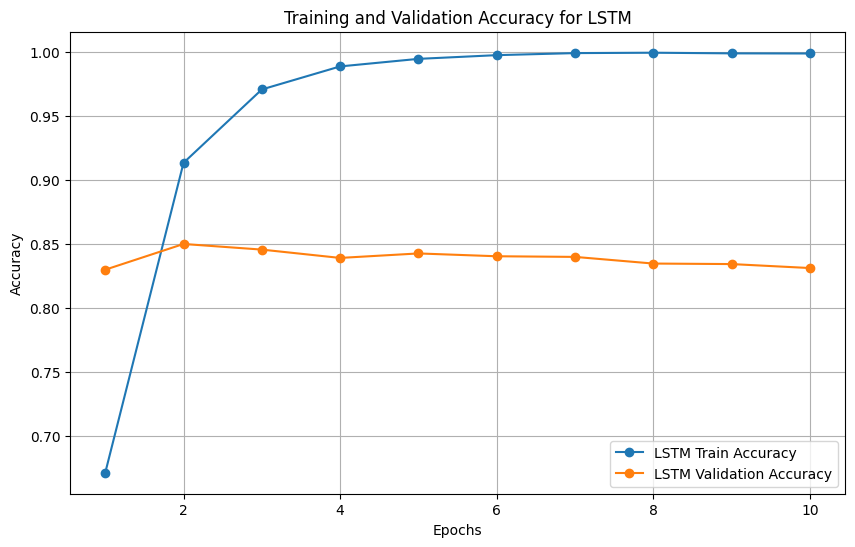

In [ ]:
import matplotlib.pyplot as plt

# Data for LSTM Accuracy Plot
epochs = list(range(1, 11))
lstm_train_accuracy = [0.6711, 0.9132, 0.9705, 0.9885, 0.9944, 0.9973, 0.9989, 0.9992, 0.9987, 0.9986]
lstm_val_accuracy = [0.8297, 0.8498, 0.8454, 0.8389, 0.8424, 0.8402, 0.8397, 0.8345, 0.8341, 0.8310]

# LSTM Accuracy Plot
plt.figure(figsize=(10, 6))
plt.plot(epochs, lstm_train_accuracy, label='LSTM Train Accuracy', marker='o')
plt.plot(epochs, lstm_val_accuracy, label='LSTM Validation Accuracy', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy for LSTM')
plt.grid(True)
plt.show()

# Data for BiLSTM Accuracy Plot
bilstm_train_accuracy = [0.6894, 0.9273, 0.9738, 0.9889, 0.9936, 0.9979, 0.9977, 0.9990, 0.9991, 0.9987]
bilstm_val_accuracy = [0.8467, 0.8454, 0.8450, 0.8454, 0.8332, 0.8323, 0.8349, 0.8362, 0.8410, 0.8415]

# Bi


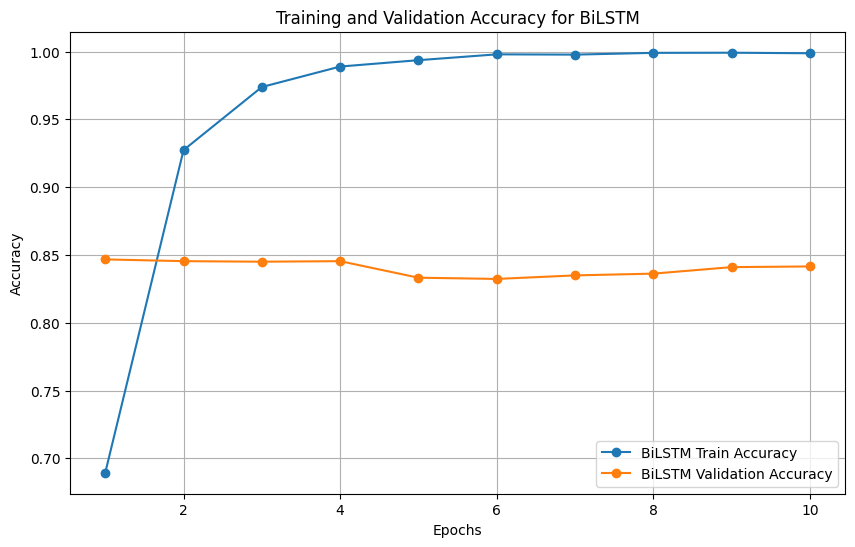

In [ ]:
import matplotlib.pyplot as plt

# Data for BiLSTM Accuracy Plot based on user-provided data
epochs = list(range(1, 11))
bilstm_train_accuracy = [0.6894, 0.9273, 0.9738, 0.9889, 0.9936, 0.9979, 0.9977, 0.9990, 0.9991, 0.9987]
bilstm_val_accuracy = [0.8467, 0.8454, 0.8450, 0.8454, 0.8332, 0.8323, 0.8349, 0.8362, 0.8410, 0.8415]

# BiLSTM Accuracy Plot
plt.figure(figsize=(10, 6))
plt.plot(epochs, bilstm_train_accuracy, label='BiLSTM Train Accuracy', marker='o')
plt.plot(epochs, bilstm_val_accuracy, label='BiLSTM Validation Accuracy', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy for BiLSTM')
plt.grid(True)
plt.show()


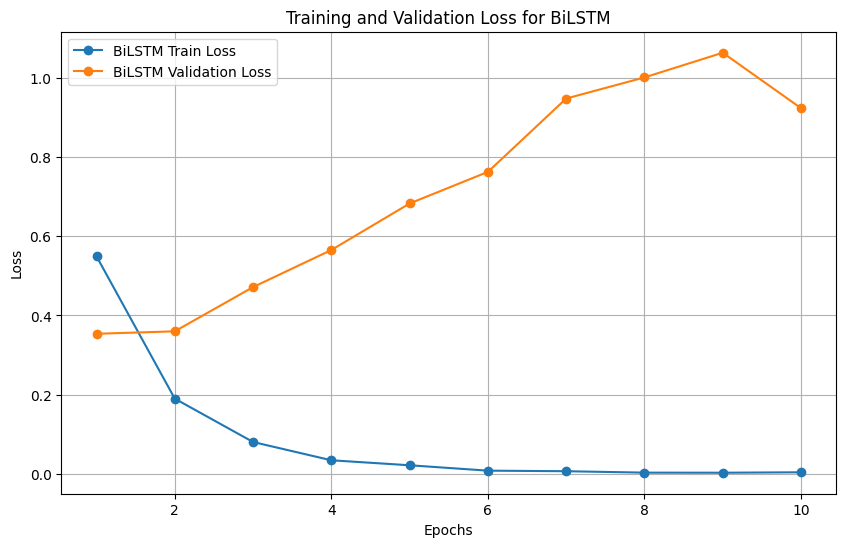

In [ ]:
import matplotlib.pyplot as plt

# Data for BiLSTM Loss Plot based on your provided values
epochs = list(range(1, 11))
bilstm_train_loss = [0.5492, 0.1900, 0.0806, 0.0345, 0.0219, 0.0083, 0.0069, 0.0033, 0.0031, 0.0042]
bilstm_val_loss = [0.3537, 0.3599, 0.4715, 0.5651, 0.6825, 0.7622, 0.9473, 1.0006, 1.0629, 0.9229]

# BiLSTM Loss Plot
plt.figure(figsize=(10, 6))
plt.plot(epochs, bilstm_train_loss, label='BiLSTM Train Loss', marker='o')
plt.plot(epochs, bilstm_val_loss, label='BiLSTM Validation Loss', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss for BiLSTM')
plt.grid(True)
plt.show()



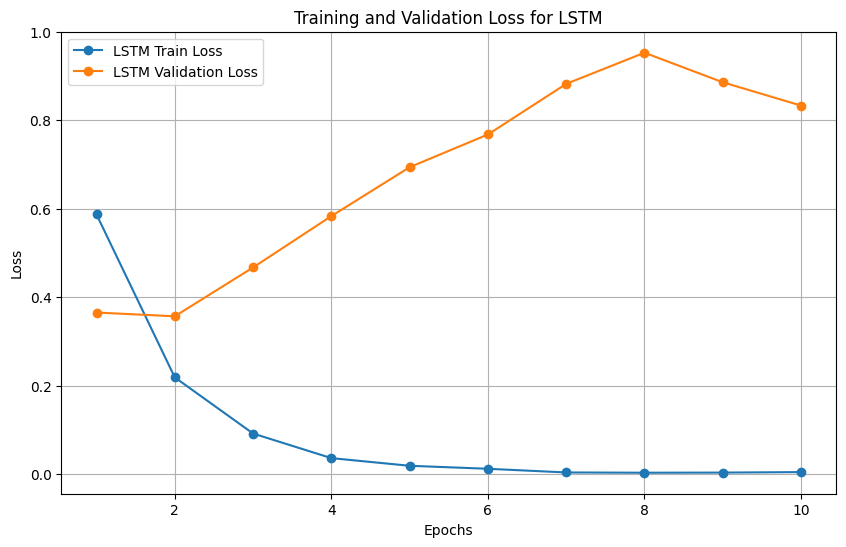

In [ ]:
import matplotlib.pyplot as plt

# Data for LSTM Loss Plot based on your provided values
epochs = list(range(1, 11))
lstm_train_loss = [0.5870, 0.2187, 0.0918, 0.0362, 0.0189, 0.0121, 0.0038, 0.0032, 0.0035, 0.0046]
lstm_val_loss = [0.3653, 0.3568, 0.4672, 0.5833, 0.6938, 0.7678, 0.8822, 0.9526, 0.8858, 0.8331]

# LSTM Loss Plot
plt.figure(figsize=(10, 6))
plt.plot(epochs, lstm_train_loss, label='LSTM Train Loss', marker='o')
plt.plot(epochs, lstm_val_loss, label='LSTM Validation Loss', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss for LSTM')
plt.grid(True)
plt.show()


In [ ]:
!pip install python-docx


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 3.7 MB/s eta 0:00:00


In [ ]:
from docx import Document

# Create a new Document
doc = Document()
doc.add_heading('Combined LSTM and BiLSTM Results Table', level=1)

# Add LSTM and BiLSTM results table
table = doc.add_table(rows=1, cols=9)
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'Epoch'
hdr_cells[1].text = 'LSTM Train Accuracy'
hdr_cells[2].text = 'LSTM Validation Accuracy'
hdr_cells[3].text = 'LSTM Train Loss'
hdr_cells[4].text = 'LSTM Validation Loss'
hdr_cells[5].text = 'BiLSTM Train Accuracy'
hdr_cells[6].text = 'BiLSTM Validation Accuracy'
hdr_cells[7].text = 'BiLSTM Train Loss'
hdr_cells[8].text = 'BiLSTM Validation Loss'

# Data for LSTM and BiLSTM accuracy and loss
epochs = list(range(1, 11))

# LSTM Data
lstm_train_accuracy = [0.6711, 0.9132, 0.9705, 0.9885, 0.9944, 0.9973, 0.9989, 0.9992, 0.9987, 0.9986]
lstm_val_accuracy = [0.8297, 0.8498, 0.8454, 0.8389, 0.8424, 0.8402, 0.8397, 0.8345, 0.8341, 0.8310]
lstm_train_loss = [0.5870, 0.2187, 0.0918, 0.0362, 0.0189, 0.0121, 0.0038, 0.0032, 0.0035, 0.0046]
lstm_val_loss = [0.3653, 0.3568, 0.4672, 0.5833, 0.6938, 0.7678, 0.8822, 0.9526, 0.8858, 0.8331]

# BiLSTM Data
bilstm_train_accuracy = [0.6894, 0.9273, 0.9738, 0.9889, 0.9936, 0.9979, 0.9977, 0.9990, 0.9991, 0.9987]
bilstm_val_accuracy = [0.8467, 0.8454, 0.8450, 0.8454, 0.8332, 0.8323, 0.8349, 0.8362, 0.8410, 0.8415]
bilstm_train_loss = [0.5492, 0.1900, 0.0806, 0.0345, 0.0219, 0.0083, 0.0069, 0.0033, 0.0031, 0.0042]
bilstm_val_loss = [0.3537, 0.3599, 0.4715, 0.5651, 0.6825, 0.7622, 0.9473, 1.0006, 1.0629, 0.9229]

# Add data rows
for i in range(len(epochs)):
    row_cells = table.add_row().cells
    row_cells[0].text = str(epochs[i])
    row_cells[1].text = str(lstm_train_accuracy[i])
    row_cells[2].text = str(lstm_val_accuracy[i])
    row_cells[3].text = str(lstm_train_loss[i])
    row_cells[4].text = str(lstm_val_loss[i])
    row_cells[5].text = str(bilstm_train_accuracy[i])
    row_cells[6].text = str(bilstm_val_accuracy[i])
    row_cells[7].text = str(bilstm_train_loss[i])
    row_cells[8].text = str(bilstm_val_loss[i])

# Save the document
word_file_path = "combined_lstm_bilstm_results.docx"
doc.save(word_file_path)
